In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

In [7]:

df = pd.DataFrame(pd.read_pickle('x_scaled.pickle'))

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.833333,0.019103,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.666667,0.126231,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.666667,0.178560,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.500000,0.344442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.008637,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
from sklearn.preprocessing import StandardScaler

dados = df.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
dados_norm = scaler.fit_transform(dados)

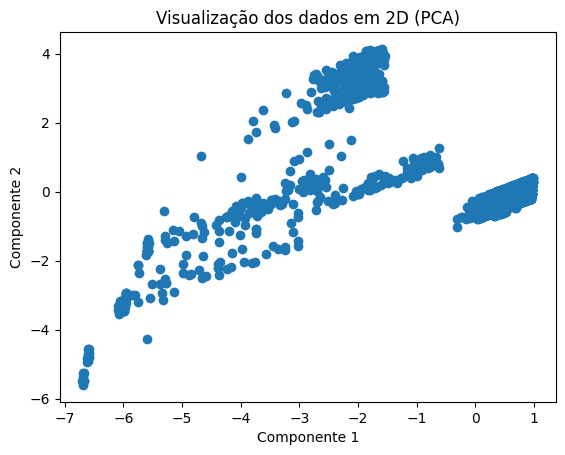

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
dados_pca = pca.fit_transform(dados_norm)

# Visualização dos dados reduzidos
plt.scatter(dados_pca[:, 0], dados_pca[:, 1])
plt.title("Visualização dos dados em 2D (PCA)")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

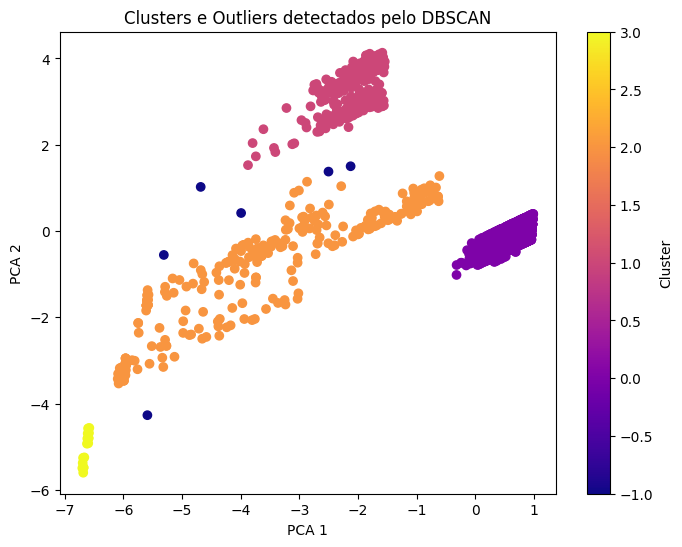

In [14]:
from sklearn.cluster import DBSCAN

# Defina eps e min_samples com base na experimentação
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(dados_pca)

# Adiciona os clusters ao dataframe
df['cluster'] = clusters

# Visualizar os clusters
plt.figure(figsize=(8, 6))
plt.scatter(dados_pca[:, 0], dados_pca[:, 1], c=clusters, cmap='plasma')
plt.title("Clusters e Outliers detectados pelo DBSCAN")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()

In [15]:
# Número de clusters (sem contar outliers)
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_outliers = list(clusters).count(-1)

print(f"Número de clusters encontrados: {n_clusters}")
print(f"Número de outliers detectados: {n_outliers}")

Número de clusters encontrados: 4
Número de outliers detectados: 6


In [16]:
outliers = df[df['cluster'] == -1]
outliers.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,cluster
1416,0.500000,0.185282,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
2028,0.333333,0.068923,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
2487,0.500000,0.671652,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
3001,0.333333,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
3014,0.333333,0.668504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1
